# Homework 5 (100 Points)

## Exercise 1 (55 pts)

For this exercise we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [1]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

### Part 1: Data pre-processing (7 pts)

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`. Take care of any missing values appropriately. [2pts]

In [2]:
bikes = pd.read_csv("citibike.csv")
bikes.isnull().any() # average_wind_speed
mean_wind = bikes["average_wind_speed"].mean()
bikes = bikes.fillna(value=mean_wind, axis=1)

b) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays [2pt]

In [3]:
groups = bikes.groupby(bikes.weekday)
weekend_bikes =groups.get_group(False)
weekday_bikes = groups.get_group(True)
weekend_bikes.reset_index(drop=True, inplace=True)
weekday_bikes.reset_index(drop=True, inplace=True)
weekday_bikes.head(), weekend_bikes.head()

(   trips  precipitation  snow_depth  snowfall  max_temperature  \
 0  20138       0.649606         0.0       0.0            75.92   
 1  35792       0.000000         0.0       0.0            82.94   
 2  36776       0.000000         0.0       0.0            78.08   
 3  37702       0.000000         0.0       0.0            82.04   
 4  34396       0.000000         0.0       0.0            80.06   
 
    min_temperature  average_wind_speed  year  season  month  holiday  \
 0            66.02             2.90802  2013  summer      8    False   
 1            66.92             4.47387  2013  summer      8    False   
 2            62.06             3.35540  2013  summer      8    False   
 3            64.04             2.68432  2013  summer      8    False   
 4            69.98             5.14495  2013  summer      8    False   
 
    stations_in_service  weekday  weekday_non_holiday  
 0                  329     True                 True  
 1                  329     True            

c) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain. [3pts]

<AxesSubplot:>

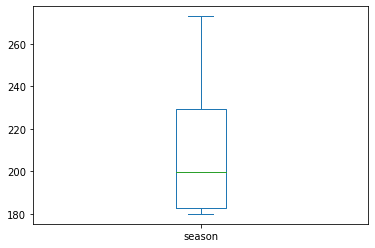

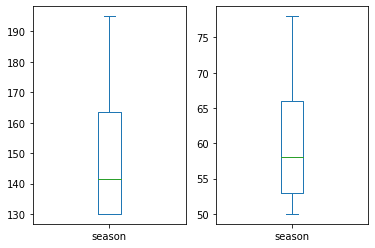

In [4]:
bikes["season"].value_counts().plot(kind="box")
figure, ax = plt.subplots(1, 2)
weekday_bikes["season"].value_counts().plot(kind="box", ax=ax[0])
weekend_bikes["season"].value_counts().plot(kind="box", ax=ax[1])

In [5]:
bikes["season"].value_counts()

fall      273
summer    215
spring    184
winter    180
Name: season, dtype: int64

--> Your answer here

### Part 2: Qualitative predictors (10 pts)

The Season variable is an example of what’s called a categorical predictor. In this part you will fit a model with a qualitative predictor and interpret the findings.

a) Using the weekdays dataset, fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. [2pt]


In [6]:
import statsmodels.formula.api as smf

In [7]:
weekday_bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True
3,37702,0.000000,0.0,0.0,82.04,64.04,2.68432,2013,summer,8,False,329,True,True
4,34396,0.000000,0.0,0.0,80.06,69.98,5.14495,2013,summer,8,False,329,True,True


In [8]:
from sklearn.linear_model import LinearRegression
weekday_bikes["features_season"] = ""
samples_num = len(weekday_bikes["season"])

for i in range(samples_num):
    if weekday_bikes["season"][i] == "spring":
        weekday_bikes.at[i, "features_season"] = 1
    elif weekday_bikes["season"][i] == "summer":
        weekday_bikes.at[i, "features_season"] = 2
    elif weekday_bikes["season"][i] == "fall":
        weekday_bikes.at[i, "features_season"] = 3
    else:
        weekday_bikes.at[i, "features_season"] = 4
        
y = pd.DataFrame(weekday_bikes["trips"])
x = pd.DataFrame(weekday_bikes["features_season"])
model = LinearRegression()
model.fit(x, y)
print(model.__dict__)

{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 1, 'coef_': array([[-3187.70663383]]), '_residues': array([8.46199625e+10]), 'rank_': 1, 'singular_': array([25.90896893]), 'intercept_': array([34728.80743872])}


C:\Users\Hxin\AppData\Local\Temp/ipykernel_7132/3113356176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_bikes["features_season"] = ""


In [9]:
model.predict([[2]])

array([[28353.39417105]])

In [10]:
weekday_bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday,features_season
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True,2
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True,2
2,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True,2
3,37702,0.000000,0.0,0.0,82.04,64.04,2.68432,2013,summer,8,False,329,True,True,2
4,34396,0.000000,0.0,0.0,80.06,69.98,5.14495,2013,summer,8,False,329,True,True,2


b) How many total coefficients are there in the model? What does each coefficient correspond to? [1pt]

 1. 5    2. regression model                

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes [2pt]

d) Repeat a) -> c) with your weekends dataset. What difference can you see? [5pt]

In [11]:
weekend_bikes["features_season"] = ""
samples_num = len(weekend_bikes["season"])

for i in range(samples_num):
    if weekend_bikes["season"][i] == "spring":
        weekend_bikes.at[i, "features_season"] = 1
    elif weekend_bikes["season"][i] == "summer":
        weekend_bikes.at[i, "features_season"] = 2
    elif weekend_bikes["season"][i] == "fall":
        weekend_bikes.at[i, "features_season"] = 3
    else:
        weekend_bikes.at[i, "features_season"] = 4
        
y = pd.DataFrame(weekend_bikes["trips"])
x = pd.DataFrame(weekend_bikes["features_season"])
model = LinearRegression()
model.fit(x, y)
print(model.__dict__)

{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 1, 'coef_': array([[-3156.16217699]]), '_residues': array([2.34593477e+10]), 'rank_': 1, 'singular_': array([16.4007197]), 'intercept_': array([29252.2182472])}


C:\Users\Hxin\AppData\Local\Temp/ipykernel_7132/2877622359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_bikes["features_season"] = ""


--> *Your answer here*

### Part 3: Multiple linear regression (10 pts)

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month [2pt]


In [12]:
y_a = pd.DataFrame(weekday_bikes["trips"])
x_a = pd.DataFrame(weekday_bikes[["snow_depth", "snowfall", "min_temperature", "max_temperature", "precipitation", "month"]])
model_a = LinearRegression()
model_a.fit(x_a, y_a)
model_a.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 6,
 'coef_': array([[ -280.41127336,   -71.38631104,   -11.15563182,   460.9413142 ,
         -8226.54939221,   661.04385206]]),
 '_residues': array([2.11831133e+10]),
 'rank_': 6,
 'singular_': array([657.3279291 ,  91.99696577,  74.54069072,  57.52446065,
         21.11663418,   8.94979996]),
 'intercept_': array([-5252.43041471])}

b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model [2pt]

The coefficients are negatively correlated in some of them. （"snow_depth", "snowfall","precipitation" "min_temperature"）The deeper the snow, the smaller the coefficient. Conversely,（"max_temperature""month"） the higher the month, the larger our coefficient.

c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve? [2pt]

In [13]:
from sklearn.metrics import r2_score

y_c = pd.DataFrame(weekday_bikes["trips"])
x_c = pd.DataFrame(weekday_bikes[["snow_depth", "snowfall", "min_temperature", "max_temperature", "precipitation", "month", "stations_in_service"]])
model_c = LinearRegression()
model_c.fit(x_c, y_c)

y_a_pred = model_a.predict(x_a)
y_c_pred = model_c.predict(x_c)

score_a = r2_score(y_a, y_a_pred)
score_c = r2_score(y_c, y_c_pred)

score_a, score_c

(0.7683414487956226, 0.8448471434713452)

--> *Your answer here*

d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership? [2pt]

--> *Your answer here*

e) Which predictors are statistically significant (95% confidence level)? [2pt]

"stations_in_service"

### Part 4: Dealing with collinearity (8 pts)

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another. (Lab 7 may help you here) [2pt]


In [14]:
x_a = pd.DataFrame(weekday_bikes[["snow_depth", "snowfall", "min_temperature", "max_temperature", "precipitation", "month"]])
print(x_a.corr())

                 snow_depth  snowfall  min_temperature  max_temperature  \
snow_depth         1.000000  0.261811        -0.493187        -0.475653   
snowfall           0.261811  1.000000        -0.237841        -0.232368   
min_temperature   -0.493187 -0.237841         1.000000         0.968400   
max_temperature   -0.475653 -0.232368         0.968400         1.000000   
precipitation      0.022949  0.237246         0.013444        -0.011895   
month             -0.439442 -0.215126         0.381236         0.329866   

                 precipitation     month  
snow_depth            0.022949 -0.439442  
snowfall              0.237246 -0.215126  
min_temperature       0.013444  0.381236  
max_temperature      -0.011895  0.329866  
precipitation         1.000000  0.003059  
month                 0.003059  1.000000  


--> Your answer here

b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated? [2pt]

In [15]:
# Your code here

--> *Your answer here*

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model. [2pt]

In [16]:
y = pd.DataFrame(weekday_bikes["trips"])
x = pd.DataFrame(weekday_bikes[["snow_depth", "snowfall", "min_temperature","precipitation", "month"]])
model = LinearRegression()
model_a.fit(x, y)
model_a.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 5,
 'coef_': array([[ -318.23671317,   -76.63373304,   467.33761546, -8806.55411244,
           528.59236731]]),
 '_residues': array([2.4105617e+10]),
 'rank_': 5,
 'singular_': array([456.68573707,  82.93801266,  58.0719827 ,  21.1280663 ,
          8.99104562]),
 'intercept_': array([1616.5491053])}

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings. [2pt]

In [17]:
# Your code here
# You can add more cells if you need them

--> *Your answer here*

### Part 5: Exploring different models (20 pts)

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? [2pts]

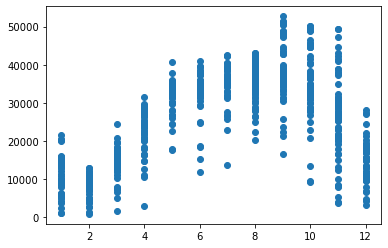

In [18]:
trips = weekday_bikes["trips"]
month = weekday_bikes["month"]
mt_fig = plt.scatter(month, trips)
mt_fig

--> *Your answer here*

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code. [4pts]

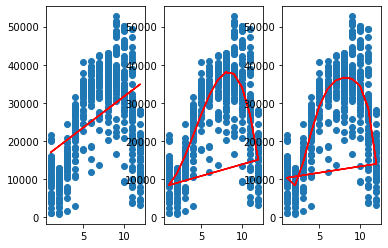

In [19]:
m1 = np.polyfit(month, trips, 1)
m2 = np.polyfit(month, trips, 3)
m3 = np.polyfit(month, trips, 5)

p1 = np.poly1d(m1)
p2 = np.poly1d(m2)
p3 = np.poly1d(m3)

y1 = p1(month)
y2 = p2(month)
y3 = p3(month)

plt.figure()
 
plt.subplot(1,3,1)
plt.plot(month, y1, 'r')
plt.scatter(month, trips)
 
plt.subplot(1,3,2)
plt.plot(month, y2, 'r')
plt.scatter(month, trips)

plt.subplot(1,3,3)
plt.plot(month, y3, 'r')
plt.scatter(month, trips)

plt.show()
# You can add more cells if you need them

In [20]:
from sklearn.metrics import r2_score

score1 = r2_score(y1, trips)
score2 = r2_score(y2, trips)
score3 = r2_score(y3, trips)

score1, score2, score3

(-2.963940102235519, 0.5090828615931887, 0.5457967540948577)

--> *Your answer here*

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features) [7pts]


In [31]:
def op_b(feature):
    
    m1 = np.polyfit(feature, trips, 1)
    m2 = np.polyfit(feature, trips, 3)
    m3 = np.polyfit(feature, trips, 5)

    p1 = np.poly1d(m1)
    p2 = np.poly1d(m2)
    p3 = np.poly1d(m3)

    y1 = p1(feature)
    y2 = p2(feature)
    y3 = p3(feature)

    plt.figure()
 
    plt.subplot(1,3,1)
    plt.plot(feature, y1, 'r')
    plt.scatter(feature, trips)
 
    plt.subplot(1,3,2)
    plt.plot(feature, y2, 'r')
    plt.scatter(feature, trips)

    plt.subplot(1,3,3)
    plt.plot(feature, y3, 'r')
    plt.scatter(feature, trips)

    plt.show()
    
    score1 = r2_score(y1, trips)
    score2 = r2_score(y2, trips)
    score3 = r2_score(y3, trips)
    print(score1, score2, score3)

# You can add more cells if you need them

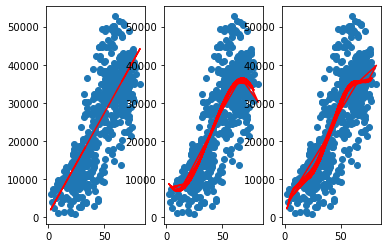

0.41456897246582947 0.5046795592769726 0.5183447834375949


In [32]:
trips = weekday_bikes["trips"]
temperature = weekday_bikes["min_temperature"]
op_b(temperature)

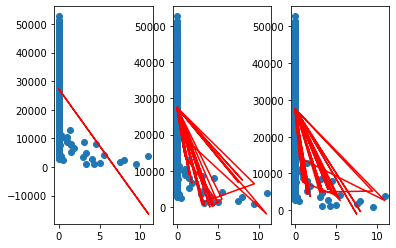

-9.94267094606497 -6.574702524367401 -6.091416179553708


In [33]:
trips = weekday_bikes["trips"]
snow = weekday_bikes["snowfall"]
op_b(snow)

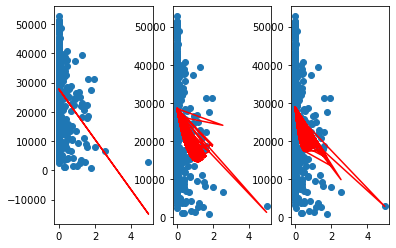

-12.16328599824111 -8.196290895360441 -7.208384804770841


In [41]:
trips = weekday_bikes["trips"]
precipitation = weekday_bikes["precipitation"]
op_b(precipitation)

--> *Your answer here*

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code. [7pts]

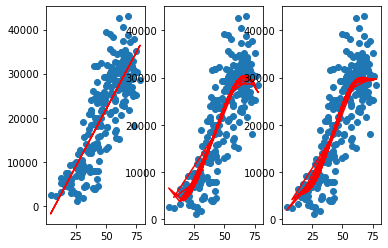

0.5108166656718776 0.5898911688325537 0.5963207454635457


In [36]:
trips = weekend_bikes["trips"]
temperature = weekend_bikes["min_temperature"]
op_b(temperature)

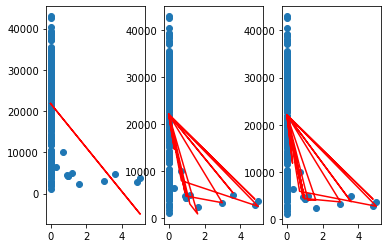

-10.147245512059403 -6.285462964860677 -6.2142849591983165


In [38]:
trips = weekend_bikes["trips"]
temperature = weekend_bikes["snowfall"]
op_b(temperature)

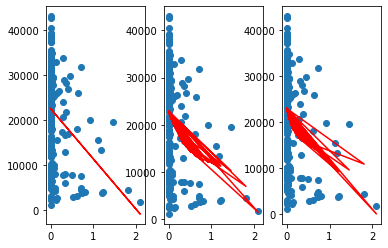

-8.290732555708129 -7.419858876268176 -7.205934240730556


In [40]:
trips = weekend_bikes["trips"]
precipitation = weekend_bikes["precipitation"]
op_b(precipitation)

--> *Your answer here*

## Exercise 2 (45pts)

In this exercise we will implement a Natural Language Processing (NLP) system using binary logistic regression.

The data you will be working with comes from the [Yelp Dataset](https://www.yelp.com/dataset). Each line is a review that consists of a label (0 for negative reviews and 1 for positive reviews) and a set of words.

```
1 i will never forget this single breakfast experience in mad...
0 the search for decent chinese takeout in madison continues ...
0 sorry but me julio fell way below the standard even for med...
1 so this is the kind of food that will kill you so there s t...
```

In order to transform the set of words into vectors, we will rely on a method of feature engineering called word embeddings. Rather than simply indicating which words are present, word embeddings represent each word by "embedding" it in a low-dimensional vector space which may carry more information about the semantic meaning of the word. (for example in this space, the words "King" and "Queen" would be close).

`word2vec.txt` contains the `word2vec` embeddings for about 15 thousand words. Not every word in each review is present in the provided `word2vec.txt` file. We can treat these words as being "out of vocabulary" and ignore them.

### Example

Let x_i denote the sentence `“a hot dog is not a sandwich because it is not square”` and let a toy word2vec dictionary be as follows:

```
hot      0.1     0.2     0.3
not      -0.1    0.2     -0.3
sandwich 0.0     -0.2    0.4
square   0.2     -0.1    0.5
```

we would first `trim` the sentence to only contain words in our vocabulary: `"hot not sandwich not square”` then embed x_i into the feature space:

$$ φ2(x_i)) = \frac{1}{5} (word2vec(\text{hot}) + 2 · word2vec(\text{not}) + word2vec(\text{sandwich}) + word2vec(\text{square})) = \left[0.02 \hspace{2mm} 0.06 \hspace{2mm} 0.12 \hspace{2mm}\right]^T $$

### Part 1 (20pts)

a) Implement a function to trim out-of-vocabulary words from the reviews. Your function should return an nd array of the same dimension and dtype as the original loaded dataset. (10pts)

In [327]:
import csv
import numpy as np

VECTOR_LEN = 300   # Length of word2vec vector
MAX_WORD_LEN = 64  # Max word length in dict.txt and word2vec.txt

################################################################################
# We have provided you the functions for loading the tsv and txt files. Feel   #
# free to use them! No need to change them at all.                             #
################################################################################


def load_tsv_dataset(file):
    """
    Loads raw data and returns a tuple containing the reviews and their ratings.

    Parameters:
        file (str): File path to the dataset tsv file.

    Returns:
        An np.ndarray of shape N. N is the number of data points in the tsv file.
        Each element dataset[i] is a tuple (label, review), where the label is
        an integer (0 or 1) and the review is a string.
    """
    dataset = np.loadtxt(file, delimiter='\t', comments=None, encoding='utf-8',
                         dtype='l,O')
    return dataset


def load_feature_dictionary(file):
    """
    Creates a map of words to vectors using the file that has the word2vec
    embeddings.

    Parameters:
        file (str): File path to the word2vec embedding file.

    Returns:
        A dictionary indexed by words, returning the corresponding word2vec
        embedding np.ndarray.
    """
    word2vec_map = dict()
    with open(file) as f:
        read_file = csv.reader(f, delimiter='\t')
        for row in read_file:
            word, embedding = row[0], row[1:]
            word2vec_map[word] = np.array(embedding, dtype=float)
    return word2vec_map


def trim_reviews(path_to_dataset):
    dataset = load_tsv_dataset(path_to_dataset)
    word2vec = load_feature_dictionary("data/word2vec.txt")
    samples_num = len(dataset)
    for i in range(samples_num):
        sentence = dataset[i][1].split()
        trimed_sen = []
        words_num = len(sentence)
        for j in range(words_num):
            if sentence[j] in word2vec:
                trimed_sen.append(sentence[j])
        dataset[i][1] = str.join(trimed_sen)
    return dataset

trim_train = trim_reviews("./data/train_small.tsv")
trim_test = trim_reviews("./data/test_small.tsv")

b) Implement the embedding and store it to a `.tsv` file where the first column is the label and the rest are the features from the embedding. Round all numbers to 6 decimal places. `embedded_train_small.tsv` and `embedded_test_small.tsv` contain the expected output of your function. (10pts)

In [328]:
def embed_reviews(trimmed_dataset):
    word2vec_map = load_feature_dictionary("./data/word2vec.txt")
    samples_num = len(trimmed_dataset)
    #embedded_dataset = np.zeros((samples_num, 301), dtype=float)
    for i in range(samples_num):
        sentence = trimmed_dataset[i][1].split()
        words_num = len(sentence)
        for j in range(words_num):
            if j == 0:
                vec = word2vec_map[sentence[j]]
            else:
                vec = vec + word2vec_map[sentence[j]]
        vec = vec / words_num
        '''for k in range(301):
            if k == 0:
                embedded_dataset[i][0] = trimmed_dataset[i][0]
            else:
                embedded_dataset[i][k] = round(vec[k-1], 6)'''
        trimmed_dataset[i][1] = np.around(vec, 6)
    return trimmed_dataset

def save_as_tsv(dataset, filename):
    with open(filename, 'w+') as f:
        samples_num = len(dataset)
        for i in range(samples_num):
            words = []
            words.append(dataset[i][0].astype(np.str))
            for j in range(300):
                #words.append('\t')
                words.append(dataset[i][1][j].astype(np.str))
            #print(words)
            f.writelines(words)
        #f.writelines(str2)'''
        
    return f

embedded_train = embed_reviews(trim_train)
embedded_test = embed_reviews(trim_test)

save_as_tsv(embedded_train, "./data/output/embedded_train_small.tsv")
save_as_tsv(embedded_test, "./data/output/embedded_test_small.tsv")

['1', '-0.166646', '0.641027', '-0.064805', '0.179903', '0.758947', '-0.967097', '-1.19115', '-0.22908', '0.417796', '0.11608', '-0.554292', '0.463389', '-0.69108', '0.820956', '-0.317469', '0.293513', '-1.194779', '-0.507363', '-0.445681', '1.536699', '-1.40285', '1.293186', '0.20608', '0.646133', '0.521062', '1.715947', '-1.319637', '0.226681', '-0.265699', '-0.427717', '-0.703018', '-1.091717', '-0.73392', '-0.885558', '1.500018', '1.646407', '1.724717', '-1.069558', '1.22292', '-1.805779', '-0.864894', '-0.00677', '0.009336', '-1.124832', '-2.408035', '-1.149929', '-0.066965', '1.165142', '-1.547903', '0.129177', '0.991372', '-1.109221', '-0.157779', '1.973991', '2.040442', '1.737779', '-0.925398', '-1.792354', '-0.675965', '-0.055726', '-0.083186', '2.203876', '-0.566425', '0.30677', '0.758805', '0.638611', '-0.525442', '1.320796', '2.089655', '0.118991', '0.538788', '0.523319', '-2.176062', '1.439345', '0.514708', '0.037628', '-2.057442', '-1.364133', '0.177053', '-0.026159', '-1

C:\Users\Hxin\AppData\Local\Temp/ipykernel_7132/3635220306.py:27: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  words.append(dataset[i][0].astype(np.str))
C:\Users\Hxin\AppData\Local\Temp/ipykernel_7132/3635220306.py:30: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  words.append(dataset[i][1][j].astype(np.str))


<_io.TextIOWrapper name='./data/output/embedded_test_small.tsv' mode='w+' encoding='cp936'>

### Part 2 (25pts)

In this part we'll be implementing Stochastic Gradient Descent for binary Logistic Regression Classifier.

Some rules:

1. Include an intercept term in your model. You must consider the bias term as part of the weight vector and not a separate term to keep track of.
2. Initialize all model parameters to 0
3. Use vector and matrix multiplication
4. Do not shuffle the data

The expected `metrics.txt` from the dataset with `500` epochs and `0.001` learning rate is:

```
error(train): 0.000000
error(test): 0.625000
```

We will be testing your code on other, larger datasets.

In [411]:
import numpy as np
import random
import math

def load_tsv_dataset(file):
    return np.loadtxt(file, delimiter='\t', encoding='utf-8')


def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)


def sgd(theta, X, Y, learning_rate):
    m = len(X)
    randIndex = int(random.uniform(0,m))
    #print("sgd:", X[randIndex].shape, theta.shape)
    h = sigmoid(np.dot(X[randIndex],theta))
    #print(type(Y[randIndex])==np.int32)
    error = compute_error(h, Y[randIndex])
    theta = theta + learning_rate*error*X[randIndex]
    return theta


def train(theta, X, y, num_epoch, learning_rate):
    for _ in range(num_epoch):
        theta = sgd(theta, X, y, learning_rate)
    return theta


def predict(theta, X):
    theta = theta.reshape(300,1)
    Y = sigmoid(np.dot(X,theta))
    return Y


def compute_error(y_pred, y):
    if type(y) == np.int32:
        error = abs(y_pred-y)
    else:
        len_y = len(y)
        error = 0.0
        y_pred = y_pred.reshape(len_y,)
        y_pred = y_pred.tolist()
        #print(y)
        for i in range(len_y):
            #print(y_pred[i], y[i])
            error += (y_pred[i]-float(y[i]))**2
        #print(error)
        error = math.sqrt(error)
        error = error / len_y
        #print(error)
    return error


def write_metrics(train_err, test_err, metrics_out):
    with open(metrics_out, 'w+') as f:
        w = "error(train): " + "{:.6f}".format(train_err) + "\n"
        w += "error(test): " + "{:.6f}".format(test_err) + "\n"
        f.write(w)
    return


def logistic_reg(formatted_train, formatted_test, metrics_out, num_epochs, learning_rate):
    train_dataset = embedded_train
    test_dataset = embedded_test
    
    theta = np.zeros((300,), dtype=float)
    y = []
    X = []
    
    train_num = len(train_dataset)
    for i in range(train_num):
        y.append(train_dataset[i][0])
        X.append(train_dataset[i][1])
    #print(type(y[0]))
    #print(X, X[0], X[0].shape)
    #print(X[0], theta)
    learned_theta = train(theta, X, y, num_epochs, learning_rate)
    train_pred = predict(learned_theta, X)
    train_err = compute_error(train_pred, y)

    X_test = []
    y_test = []
    
    test_num = len(test_dataset)
    for i in range(test_num):
        y_test.append(test_dataset[i][0])
        X_test.append(test_dataset[i][1])
    
    test_pred = predict(learned_theta, X_test)
    test_err = compute_error(test_pred, y_test)

    write_metrics(train_err, test_err, metrics_out)
    return


logistic_reg("./data/output/embedded_train_small.tsv", "./data/output/embedded_test_small.tsv", "./data/output/metrics.txt", 500, 0.001)